# Assignment 1 - Inverse Problems

In [1]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

### Question 1 and 2

In order to calculate the arrival-time anomalies, I start by discretizing the space. I have done this by defining a 13x11 matrix where each entry corresponds to a 1x1 m square. I have set the entries corresponding to the space outside the grey box equal to zero, and the grey box is indicated by ones in the entries.

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


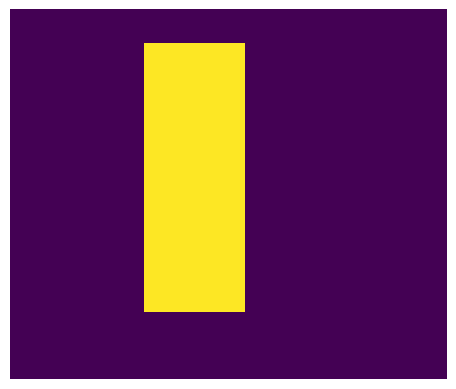

In [2]:
v = 5  # wave propagation velocity OUTSIDE grey box
v_box = 5.2  # wave propagation velocity INSIDE the grey box

# geometry of the system
X = 13  # the system is 13 m along the x-axis
Z = 11  # and 11 m along the z-axis

T = 22  # number of rays detected

# the space is distretized into 13 x 11 squares of area 1 m^2
area = np.zeros([Z, X])  # zeros correspond to the area outside the grey box
area[1:9, 4:7] = 1  # ones correspond to the grey box

print(area)  # print the matrix corresponding to the area
plt.imshow(area);  # show the area with a contour plot
plt.axis("off");


Next, I define functions in order to calculate arrival-time anomalies for each of the 22 rays. The first function computes the path that a particular ray takes through the space.

This first function is incorporated in the second function which computes the arrival time anomalis for the rays. The function is given a number of start-coordinates of rays, and for each individual ray, the path is computed. Then, for every square inside the grey box which the particular ray passes through, the value $(\frac{1}{v} - \frac{1}{v_{box}}) \sqrt{2}$ is added to the arrival-time anomaly for that particular ray. This is because the arrival time anomaly is in general given by:

$$t = \int s(u) du$$

For the distretized space, this is equivalent to:

$$t = \Sigma s(u) \Delta u$$

But the slowness anomaly, $s(u)$ is only non-zero when the ray is inside the grey box where it is given by:

$$s_{box} = \frac{1}{v} - \frac{1}{v_{box}}$$

Since the rays move diagonally and the distance between the two opposite corners of a 1x1 m square is equal to $\sqrt{2}$ m, this leaves me to conclude that the arrival time anomaly for a ray is given by $(\frac{1}{v} - \frac{1}{v_{box}}) \sqrt{2}$ times the number of 1x1 m squares of grey box that the particular ray passes through.

In [3]:
# I define a function which computes the path through the area of each of the rays

def ray_path(initial_coord, T=T, Z=Z, X=X):
    """This function takes the initial coordinates of a ray and returns an array which contains the path of the ray through the area."""

    path = np.zeros((Z, X))  # initialize array for ray path
    coord = np.copy(initial_coord)  # initialize the coordinates where the ray currently is

    if coord[1] < 6:  # check if the ray comes from the left (source 1)
        while coord[0] >= 0 and coord[1] <=12:  # only loop while the ray is still inside the area
            z, x = coord  # define current z- and x-coordinates of the ray
            path[z, x] = 1  # set the entry of the path array corresponding to the current position of the ray equal to 1
                
            # take a step to the next position of the ray 
            coord[0] -= 1
            coord[1] += 1

    elif coord[1] > 6:  # check if the ray comes from the right (source 2)
        while coord[0] >= 0 and coord[1] <=12:  # only loop while the ray is still inside the area
            z, x = coord  # define current z- and x-coordinates of the ray
            path[z, x] = 1  # set the entry of G_i corresponding to the current position of the ray equal to 1

            # take a step to the next position of the ray
            coord[0] -= 1
            coord[1] -= 1
        
    return path


# I define a function to calculate the arrival time anomalis

def arrival_time_anomali(start_coord, T=T, area=area, v=v, v_box=v_box):
    """This function takes an array of start coordinates for rays and returns an array of arrival time anomalis for these rays."""

    t_gamma = np.zeros(T)  # initialize array of arrival time anomalis
    
    for i in range(T):  # loop over all rays
        path_i = ray_path(start_coord[i])  # calculate ray path for current ray
        # loop over the entire area
        for j in range(Z):
            for k in range(X):
                if path_i[j, k] == 1 and area[j, k] == 1:  # if the ray is in a square inside the grey box, add the below to the arrival time anomali for the current ray
                    t_gamma[i] += (1/v - 1/v_box) * np.sqrt(2)  # arrival time anomali through a single square of 1 m2 in the grey box
    
    return t_gamma
            

Now I define the start coordinates of each of the 22 rays.

In [4]:
# start coordinates for the rays coming from source 1
start_coord1 = np.array([[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [10, 1]])  #z,x

# start coordinates for the rays coming from source 2
start_coord2 = np.array([[1, 12], [2, 12], [3, 12], [4, 12], [5, 12], [6, 12], [7, 12], [8, 12], [9, 12], [10, 12], [10, 11]])  #z,x

# combine the two arrays
start_coord = np.append(start_coord1, start_coord2, axis=0)

And then I use my function to compute the arrival-time anomalies of these rays. I also print the results to make sure that they look reasonable which they do.

In [5]:
t_gamma = arrival_time_anomali(start_coord)  # calculate arrival time anomalies

print("The calculated arrival time anomalies are: \n")
for t in t_gamma:
     print(f"{t:5.4f} seconds, corresponding to {t*1/np.sqrt(2)*(1/5-1/5.2)**(-1):1.0f} squares of grey box")


The calculated arrival time anomalies are: 

0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0109 seconds, corresponding to 1 squares of grey box
0.0218 seconds, corresponding to 2 squares of grey box
0.0326 seconds, corresponding to 3 squares of grey box
0.0326 seconds, corresponding to 3 squares of grey box
0.0326 seconds, corresponding to 3 squares of grey box
0.0326 seconds, corresponding to 3 squares of grey box
0.0326 seconds, corresponding to 3 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0000 seconds, corresponding to 0 squares of grey box
0.0109 seconds, corr

### Question 3

I start by computing the Gaussian noise which I am going to add to the data computed above.

In [6]:
t_pure = t_gamma  # the data without noise is the calculated arrival-time anomalies

np.random.seed(10)
n = np.random.normal(loc=0.0, scale=1.0, size=T)  # calculate Gaussian noise with mean 0
n_normalized = 1/18*np.linalg.norm(t_pure) / np.linalg.norm(n) * n  # normalize noise

print(f"The noise has been normalized to have the norm {np.linalg.norm(n_normalized):7.6f}.")
print(f"As expected, this corresponds to 1/18 norm(t_pure) = {1/18*np.linalg.norm(t_pure):7.6f}. \n")

sigma = np.std(n_normalized)  # I calculate the standard deviation of the distribution of noise
print(f"The noise has the uncertianty sigma = {sigma:7.6f}.")

The noise has been normalized to have the norm 0.005473.
As expected, this corresponds to 1/18 norm(t_pure) = 0.005473. 

The noise has the uncertianty sigma = 0.001165.


In [7]:
t_obs = t_pure + n_normalized  # compute the "observed" data with noise

I am now going to formulate the inverse problem so that it has the form:

$$d = G m$$

The data, $d$, is the computed arrival-time anomalies with noise. The model, $m$, is the slowness anomaly values in the discretized area. Hence, I might as well write:

$$t_{obs} = G s$$

And this needs to reproduce the discretized equation:

$$t = \Sigma s(u) \Delta u$$

Hence, I need to define my matrix $G$ such that a row in $G$ corresponds to the path of a particular ray normalized to the length that a ray travels over a single square of 1 $m^2$. This means that the entries in $G$ should be equal to $\sqrt{2}$ for the entries that correspond to squares of 1 $m^2$ that the ray travels across and zero for all other entries. In this way, the sum over a row in $G$ will correspond to the number of meters that a particular ray travels in total.

I define a function to compute $G$ according to this definition.

In [8]:
# I define a function to compute the matrix G of the inverse problem

def G_matrix(start_coord):
    """This function takes an array of start coordinates of the rays and returns the matrix G of the inverse problem."""

    G = np.zeros((T, X*Z))  # initialize G matrix

    for i in range(T):  # loop over all the rays
        G_i = ray_path(start_coord[i])  # calculate the path of the current ray
        G[i,:] = np.ndarray.flatten(G_i)  # set G_i as the i'th row in the G matrix

    G = np.sqrt(2) * G  # normalize G so that the sum over a row corresponds to the distance travled by a ray

    return G

And then I compute $G$ for the particular rays of this problem.

In [9]:
G = G_matrix(start_coord)

### Problem 4

In general, an inverse problem can be formulated as:

$$d = g(m)$$

Here, $d$ is the data, $m$ is the model which one wishes to solve for, and $g$ is some (possibly non-linear) function relating the model to the data.

This problem is clearly linear since the relation between the model and data is a matrix equation:

$$d = G m$$

Seen another way, the fact that the problem can be stated as a matrix equation means that the problem can also be formulated in terms of a number of linear equations (in this case 22 corresponding to the number of rows in $G$) between the model and data.

### Problem 5

The matrix $G$ has $22$ rows and $13 \times 11 = 143$ columns. This means that there are 22 equations but 143 unknowns that we wish to solve for. So the problem is highly underdetermined, meaning that there are more unknowns than equations.

Since the problem is underdetermined, there is no unique solution to the problem.

### Problem 6

I am now going to solve for the slowness anomaly values using Tikhonov Regularization. First, I define a function to perform the Tikhonov Regularization.

In [10]:
# I define a function to compute the solution to the inverse problem

def Tikhonov_Regularization(G, t, epsilon, Z=Z, X=X):
    """This function utilized Tikhonov Regularization to compute the solution to the linear inverse problem. That is, the function takes the matrix G and data t and computes the model m."""
    s_estimate = np.linalg.inv(np.matmul(G.T, G) + epsilon**2 * np.identity(Z*X)) @ G.T @ t  # Perform Tikhonov Regularization
    return s_estimate

Then I compute the solution. I want to compute a solution which "barely fits the data within the noise". This means that I want to pick a value for $\epsilon$ for which:

$$d_{obs} - G m_{model} \approx N \sigma^2$$

Where $N$ is the number of data points and $\sigma$ is the uncertainty on the data points (which is the standard deviation of the noise). A good value for $\epsilon$ to achieve this turns out to be $\epsilon = 0.9$.

I also visualize the result. Since the slowness anomaly has the constant value $s_{box} = \frac{1}{v} - \frac{1}{v_{box}}$ inside the grey box and is zero outside it, I expect the model to have the constant value $s_{box}$ in the coordinates where the grey box is located and to be zero outside it. I also visualize the "real" location of the grey box for comparison. Furthermore, I have computed the numerical value of $s_{box}$ as well for comparison.

I discuss the results in the answer to question 8.

d_obs - G m_model = 1.3389497852333337e-05
N sigma^2 = 2.9834561708176062e-05

s_box = 0.00769


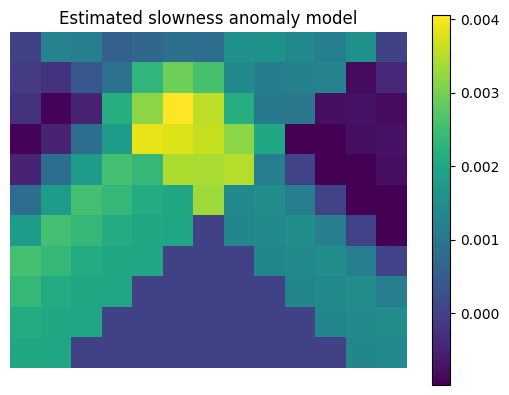

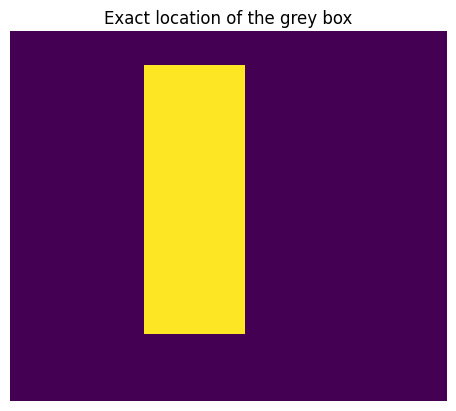

In [11]:
s_estimate = Tikhonov_Regularization(G, t_obs, epsilon=0.9)  # Compute model

s_est = s_estimate.reshape(Z, X)  # Reshape model

# This is used to determine the value of epsilon such that the model "barely fits the data within the noise"
print(f"d_obs - G m_model = {np.linalg.norm(t_obs - G @ s_estimate)**2}")
print(f"N sigma^2 = {len(t_obs) * sigma**2}\n")

# Plot the estimated model
plt.imshow(s_est);
plt.axis("off");
plt.colorbar();
plt.title("Estimated slowness anomaly model");

plt.figure();
plt.imshow(area);
plt.axis("off");
plt.title("Exact location of the grey box")

s_box = 1/v - 1/v_box
print(f"s_box = {s_box:.3}")

### Problem 7

Next, I want to describe how well the model is resolved by the inverse operator. I will do this by plotting how a delta-function (without noise) consisting of a single non-zero square of 1 $m^2$ in the area is reconstructed.

The inverse operator will give me an estimated model of the slowness anomaly $s$ from the delta-function. Therefore, to get a model for the delta-function directly instead, I divide the estimated model by $s_{box}$ which is the theoretical value of the slowness anomaly.

Furthermore, since there is no noise on the delta-function, I have chosen an $\epsilon$ that minimizes the difference between the "real" data and the reconstructed data.

d_delta_function - G m_model = 6.347393887788967e-19 

The value at the location of the delta function in the true model is 1.0000.
The value at the location of the delta function in the estimated model is 0.1821.


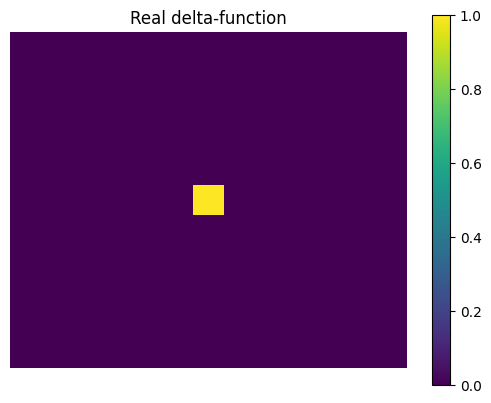

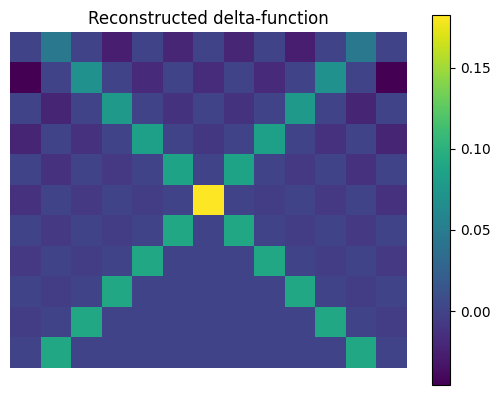

In [12]:
# Here I compute how the estimated model reconstructs a delta function

delta_function = np.zeros((Z, X))  # initialize the area
delta_function[5,6] = 1  # create a single sqaure with value 1 (delta function)

t_delta_func = arrival_time_anomali(start_coord, area=delta_function)  # compute exact arrival time anomalis for the delta function

# compute the estimated model of the delta function
s_estimate_delta_func = Tikhonov_Regularization(G, t_delta_func, epsilon=0.001)

# I reshape and divide by s_box to get a model of the delta-function directly instead of the slowness anomaly of the delta-function
est_delta_func = s_estimate_delta_func.reshape(Z, X) / s_box 

# plot the delta function
plt.imshow(delta_function);
plt.colorbar();
plt.axis("off");
plt.title("Real delta-function")

# plot the model's reconstruction of the delta function
plt.figure();
plt.imshow(est_delta_func);
plt.colorbar();
plt.axis("off");
plt.title("Reconstructed delta-function")

# since there is no noise on the data for the delta function, I have chosen an epsilon that
# minimizes the difference between the exact data and the estimated data from the model
print(f"d_delta_function - G m_model = {np.linalg.norm(t_delta_func - G @ s_estimate_delta_func)**2} \n")

print(f"The value at the location of the delta function in the true model is {delta_function[5,6]:4.4f}.")
print(f"The value at the location of the delta function in the estimated model is {est_delta_func[5,6]:4.4f}.")

I see that even for a delta-function where there is no noise, the inverse operator is not able to reconstruct the "true" model exactly. But luckily, the "real" location of the delta-function has the highest value, and the value everywhere else is lower. In fact, the value is close to zero for all coordinates except along the paths of the rays that pass through the delta-function. However, this is expected since the model has no way of knowing where along the path of a single ray that the delta-function would be located. The model only knows if a particular ray at some point has passed through the delta-function due to the arrival-time anomaly that this creates. However, by combining information from multiple rays, the model can estimate where the delta-function is more likely to be located. For example, the delta-function is more likely to be located at a coordinate where two rays both showing arrival-time anomalies cross each other which is also seen above. But the model has no way of knowing for sure that there are no other places along these rays where the "true" model is non-zero.

Furthermore, the value of the estimated delta-function in the place where the "true" delta-function is located is only 0.18 even though the "true" delta-function has the value 1 in this coordinate. This is probably due to the model "smearing out" the result as described above.

### Problem 8

In the answer to problem 6, I can see that the model is not able to reconstruct the grey box exactly. However, the model does have the highest values for $s$ (yellow squares) in the place where the "top" of the box is located. It was expected that the model would be able to reconstruct the "top" of the grey box better than the "bottom". When looking at Figure 1 in the assignment, it is evident that more rays cross the "top" of the grey box than the "middle". And actually no rays pass through the right "bottom" of the grey box. If no (or only few) rays pass through a region of the grey box, then the model has no way of "knowing" that the grey box is there, and hence these parts of the grey box can't be reconstructed.

Furthermore, the model also shows significant values of $s$ along the entire path of the rays that pass through the grey box even in places where the "real" box is not located (green areas). However, this is also expected, since the model can't know where along the path of a single ray that the grey box is located. It is only when combining information from several rays that the model has a change to compute where the grey box has a higher likelihood of being located as also described for the delta-function in the prevoius problem. For example, the grey box is probably more likely to be where rays showing arrival time anomalies coming from both left and right cross each other which is also seen in the model which has higher values of $s$ here (yellow region).

Furthermore, the theoretical value of $s_{box}$ is approximately 0.008 as computed above. But the highest value that the model predicts is 0.004. This is probably due to the fact that the model "smeares out" the result both because of the noise in the data and also because the model is not able to tell exactly where along the path of a ray that the box is located as also discussed above.